# Chapter 8 Calculate the Frequency of Your Data with Histograms and Build Interactive Tables with DataTable


* Creating a histogram 
* Customizing the histogram by modifying its bins and using multiple histograms 
* Adding interactivity to histograms 
* Creating a 2d histogram 
* Creating a DataTable 
* Controlling the look and feel of the table (cell width, height, text display, and more) 
* Adding histograms and tables to the app 

In [1]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import dash
import jupyter_dash as jd
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
import dash_bootstrap_components as dbc
from dash.dependencies import Output, Input, State
from dash.exceptions import PreventUpdate
from dash_table import DataTable
import pandas as pd
pd.options.display.max_columns = None

for p in [plotly, dash, jd, dcc, html, dbc, pd,]:
    print(f'{p.__name__:-<30}v{p.__version__}')


plotly------------------------v4.14.3
dash--------------------------v1.20.0
jupyter_dash------------------v0.4.0
dash_core_components----------v1.16.0
dash_html_components----------v1.1.3
dash_bootstrap_components-----v0.12.0
pandas------------------------v1.2.3


In [2]:
poverty = pd.read_csv('../data/poverty.csv', low_memory=False)
poverty.head(3)

Country Name Country Code  year  \
0  Afghanistan          AFG  1974   
1  Afghanistan          AFG  1975   
2  Afghanistan          AFG  1976   

   Annualized growth in per capita real survey mean consumption or income, bottom 40% (%)  \
0                                                NaN                                        
1                                                NaN                                        
2                                                NaN                                        

   Annualized growth in per capita real survey mean consumption or income, top 10% (%)  \
0                                                NaN                                     
1                                                NaN                                     
2                                                NaN                                     

   Annualized growth in per capita real survey mean consumption or income, top 60% (%)  \
0                                                NaN                                     
1                                                NaN                                     
2                                                NaN                                     

   Annualized growth in per capita real survey mean consumption or income, total population (%)  \
0                                                NaN                                              
1                                                NaN                                              
2                                                NaN                                              

   Annualized growth in per capita real survey median income or consumption expenditure (%)  \
0                                                NaN                                          
1                                                NaN                                          
2                                                NaN                                          

   GINI index (World Bank estimate)  \
0                               NaN   
1                               NaN   
2                               NaN   

   Growth component of change in poverty at $1.90 a day (2011 PPP) (% of change)  \
0                                                NaN                               
1                                                NaN                               
2                                                NaN                               

   Growth component of change in poverty at $3.20 a day (2011 PPP) (% of change)  \
0                                                NaN                               
1                                                NaN                               
2                                                NaN                               

   Growth component of change in poverty at $5.50 a day (2011 PPP) (% of change)  \
0                                                NaN                               
1                                                NaN                               
2                                                NaN                               

   Income share held by fourth 20%  Income share held by highest 10%  \
0                              NaN                               NaN   
1                              NaN                               NaN   
2                              NaN                               NaN   

   Income share held by highest 20%  Income share held by lowest 10%  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   

   Income share held by lowest 20%  Income share held by second 20%  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                    

In [3]:
gini = 'GINI index (World Bank estimate)'
income_top10 = 'Income share held by highest 10%'
df = poverty[poverty['is_country'] & poverty['year'].eq(2015)]

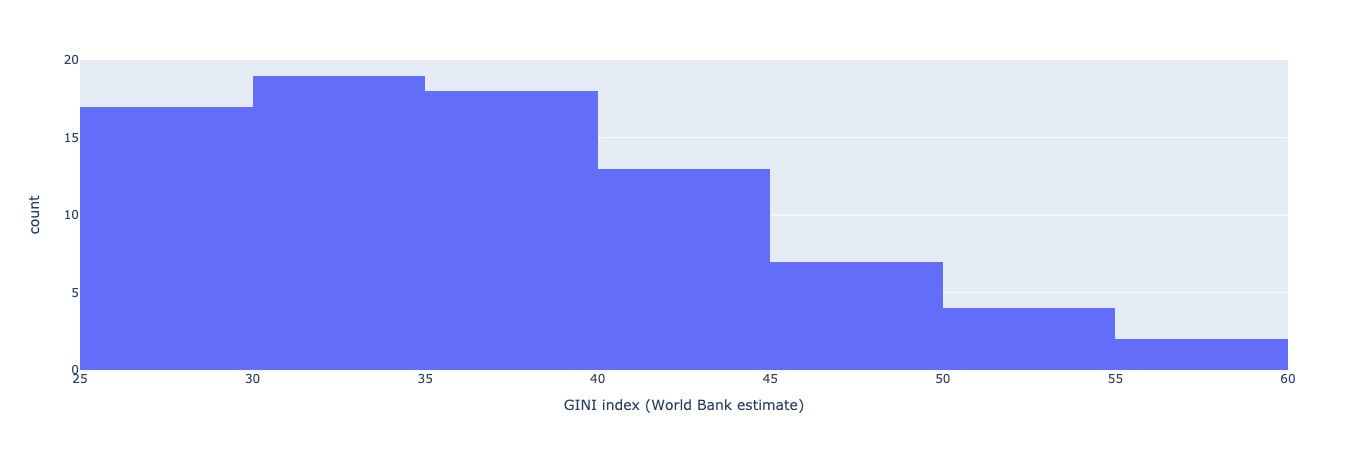

In [4]:
px.histogram(df, x=gini)

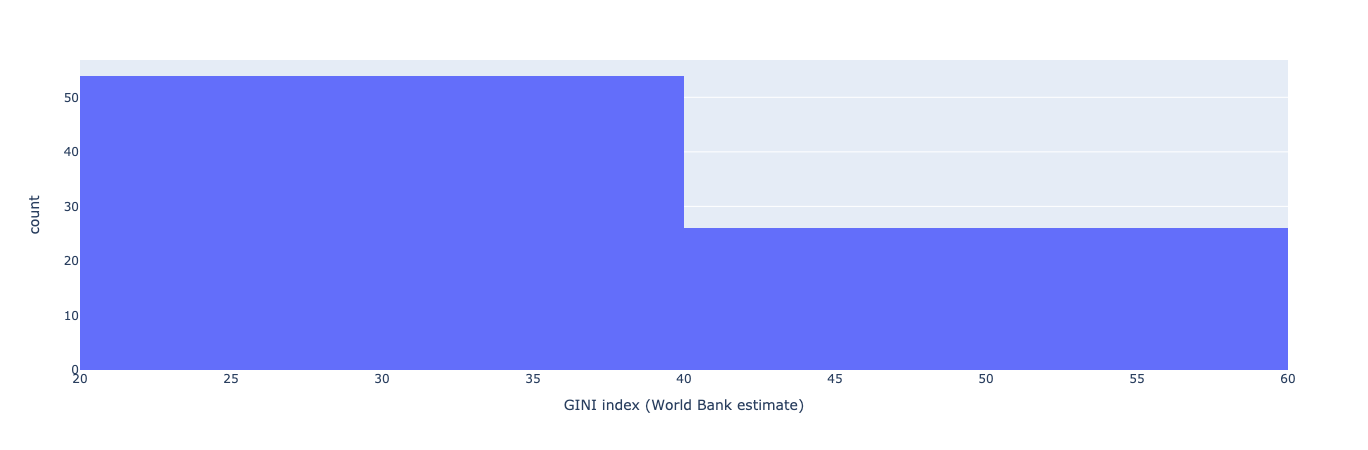

In [5]:
px.histogram(df, x=gini, nbins=2)

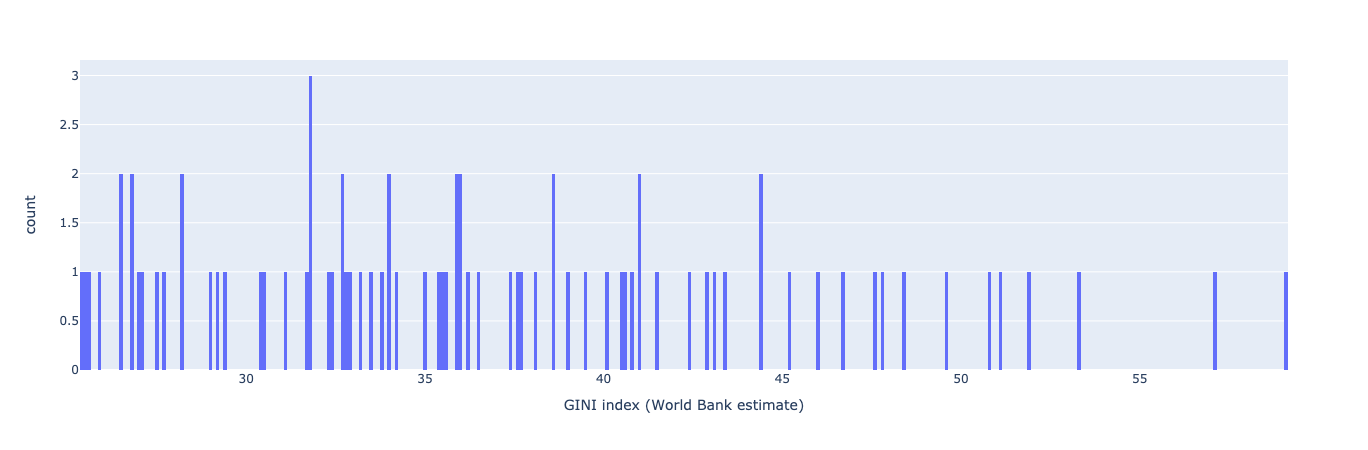

In [6]:
px.histogram(df, x=gini, nbins=500)

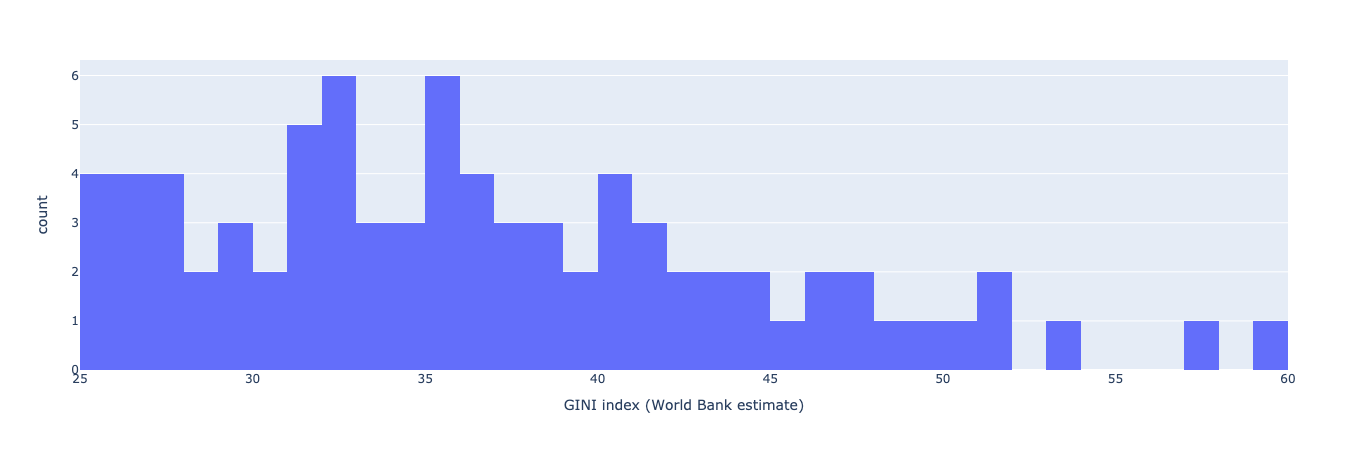

In [7]:
px.histogram(df, x=gini, nbins=45)

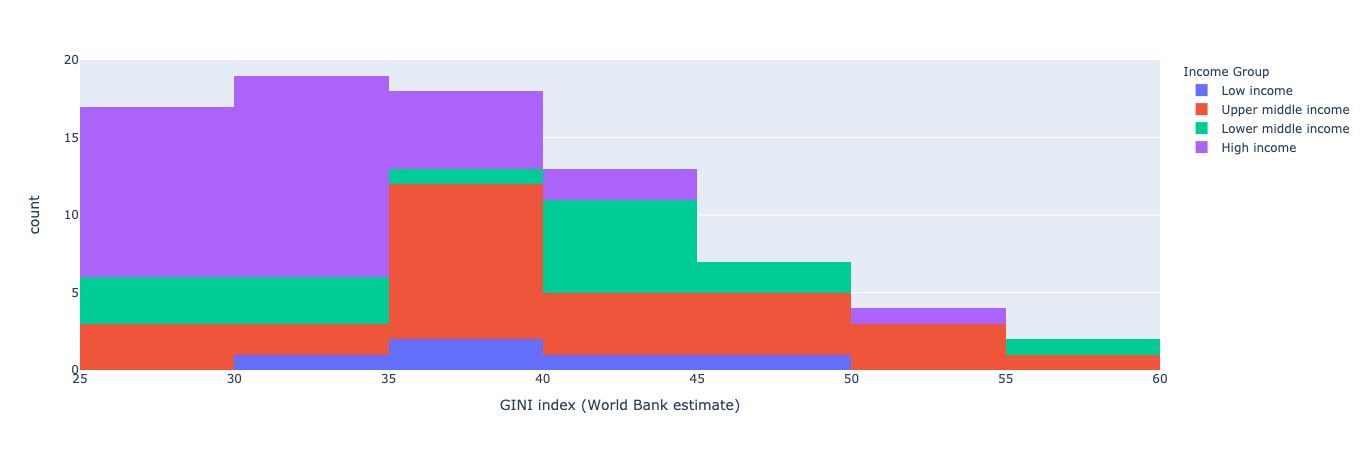

In [8]:
px.histogram(df, x=gini, color='Income Group')

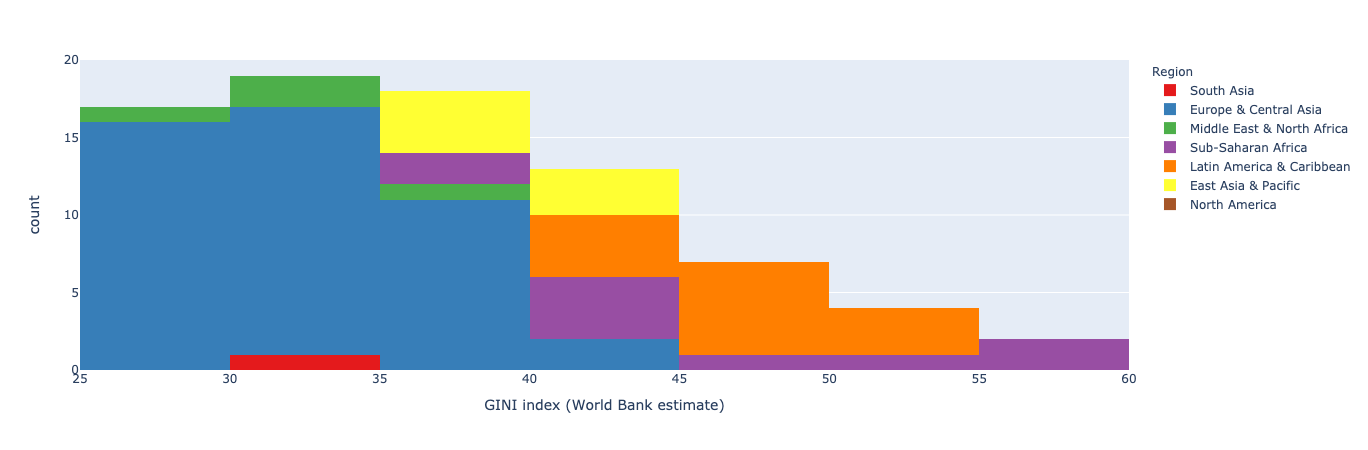

In [9]:
px.histogram(df, x=gini, color='Region', 
             color_discrete_sequence=px.colors.qualitative.Set1)

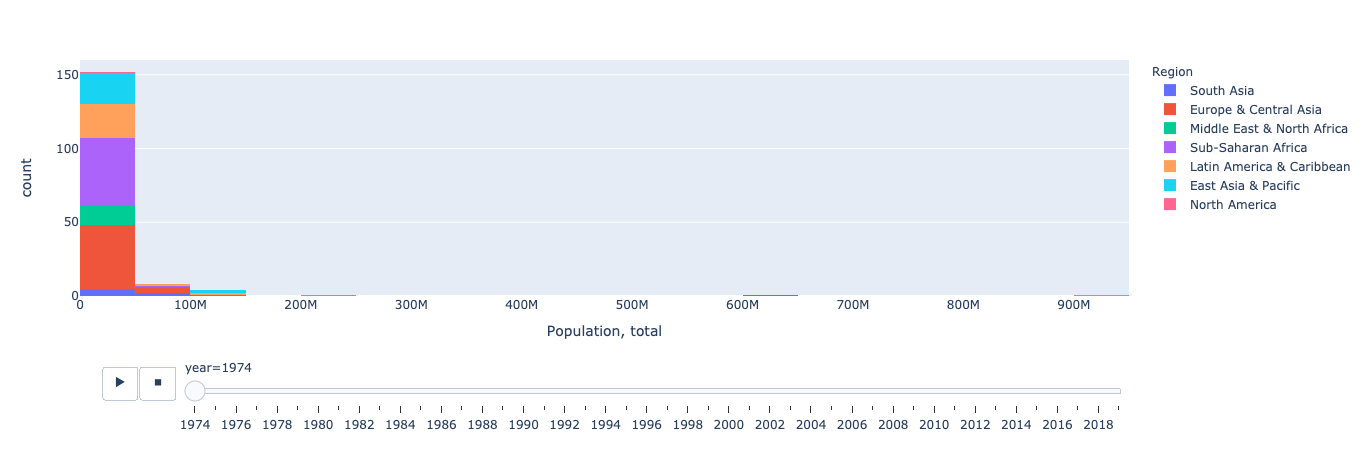

In [10]:
df = poverty[poverty['is_country']]
px.histogram(df, x='Population, total', 
             color='Region', 
             animation_frame='year')

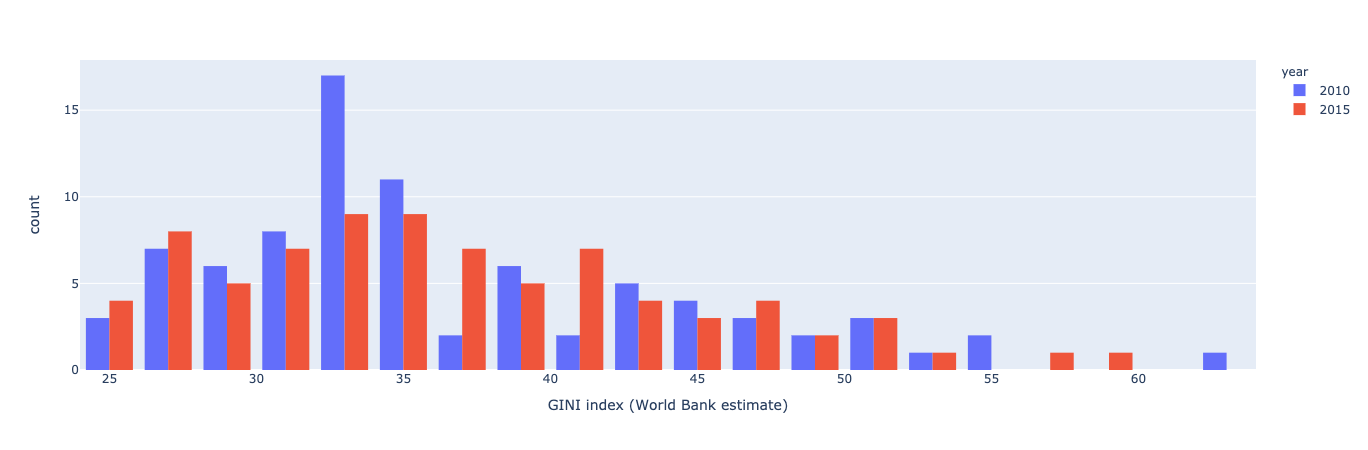

In [11]:
df = poverty[poverty['is_country'] & poverty['year'].isin([2010, 2015])]

px.histogram(df, x=gini, color='year', barmode='group')

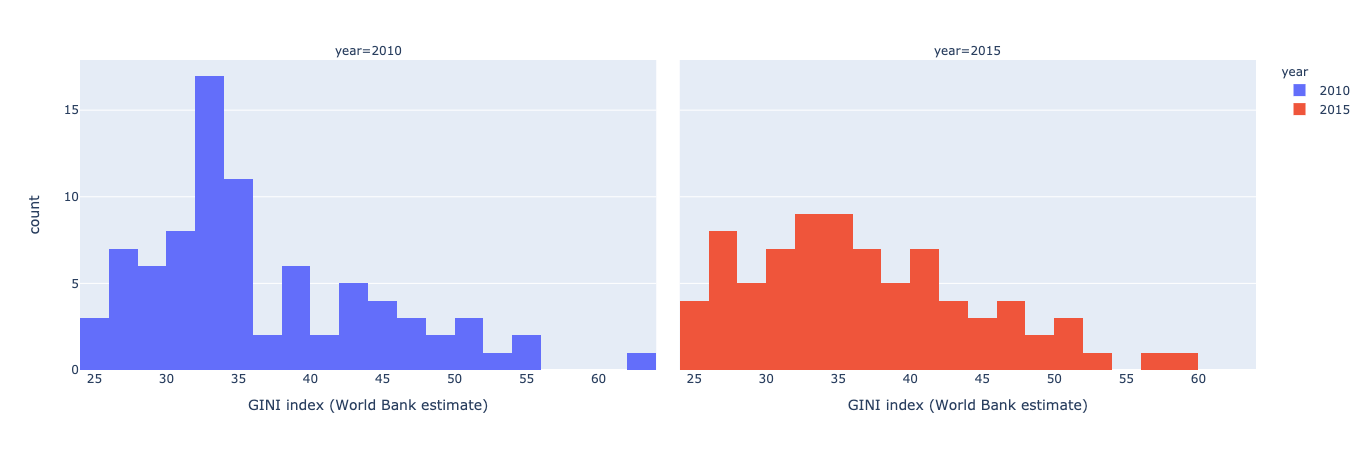

In [12]:
px.histogram(df, x=gini, color='year', facet_col='year')

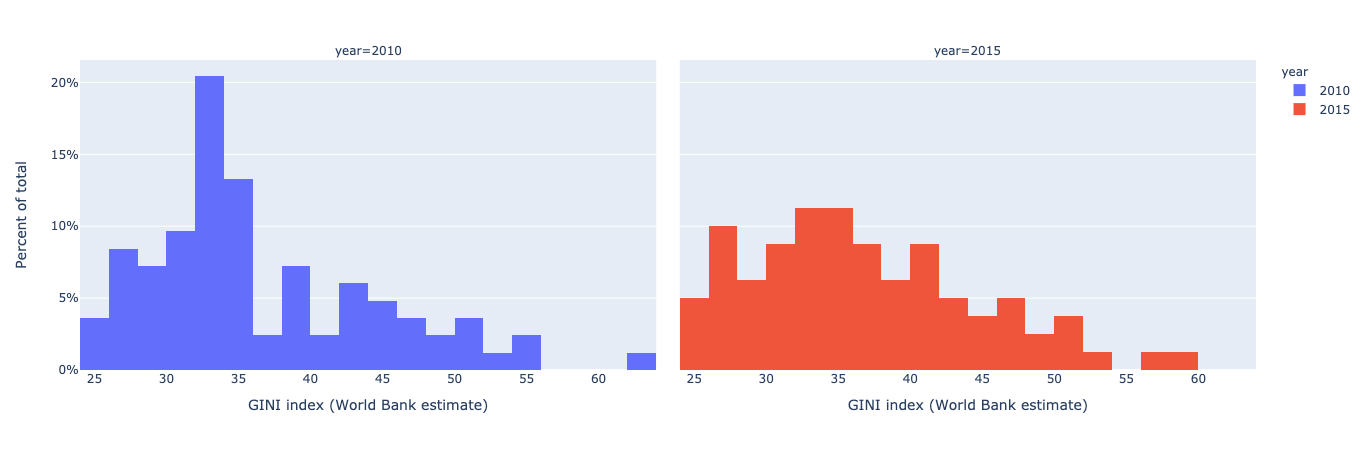

In [13]:
fig = px.histogram(df, x=gini, color='year', facet_col='year', histnorm='percent')
fig.layout.yaxis.ticksuffix = '%'
fig.layout.yaxis.title = 'Percent of total'
fig

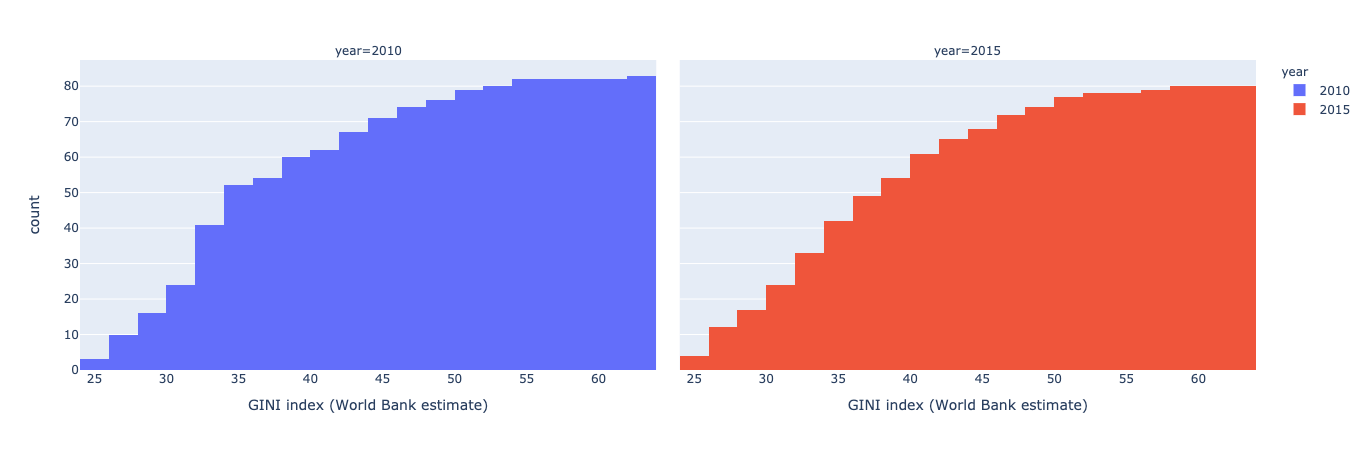

In [14]:
px.histogram(df, x=gini, color='year', facet_col='year', cumulative=True)

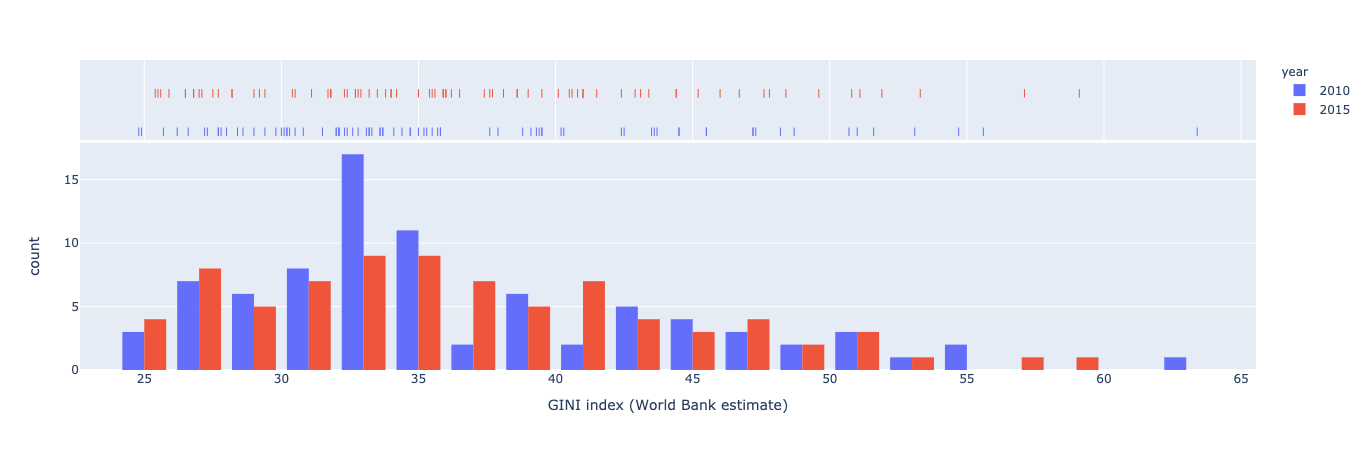

In [15]:
df = poverty[poverty['is_country'] & poverty['year'].isin([2010, 2015])]

px.histogram(df, x=gini, marginal='rug',color='year', barmode='group')


In [16]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.COSMO])

app.layout = html.Div([
    html.Br(),
    dbc.Row([
        dbc.Col(lg=1,),
        dbc.Col([
            dbc.Label('Indicator:'),
            dcc.Dropdown(id='hist_indicator_dropdown',optionHeight=40,
                         value='GINI index (World Bank estimate)',
                         options=[{'label': indicator, 'value': indicator}
                                  for indicator in poverty.columns[3:54]]),
        ], lg=5),
        dbc.Col([
            dbc.Label('Years:'),
            dcc.Dropdown(id='hist_multi_year_selector',
                         multi=True,
                         value=[2015],
                         placeholder='Select one or more years',
                         options=[{'label': year, 'value': year}
                                  for year in poverty['year'].drop_duplicates().sort_values()]),
        ], lg=4),
    ]),
    html.Br(),
    dbc.Row([
        dbc.Col(lg=2),
        dbc.Col([
            html.Br(),
            dbc.Label('Modify number of bins:'),
            dcc.Slider(id='hist_bins_slider', 
                       dots=True, min=0, max=100, step=5, included=False,
                       marks={x: str(x) for x in range(0, 105, 5)}),
        ], lg=6)
        
    ]),

    dcc.Graph(id='indicator_year_histogram'),

], style={'backgroundColor': '#E5ECF6'})

@app.callback(Output('indicator_year_histogram', 'figure'),
              Input('hist_multi_year_selector', 'value'),
              Input('hist_indicator_dropdown', 'value'),
              Input('hist_bins_slider', 'value'))
def display_histogram(years, indicator, nbins):
    if (not years) or (not indicator):
        raise PreventUpdate
    df = poverty[poverty['year'].isin(years) & poverty['is_country']]
    fig = px.histogram(df, x=indicator, facet_col='year', color='year', 
                       title=indicator + ' Histogram',
                       nbins=nbins,
                       facet_col_wrap=4, height=700)
    fig.for_each_xaxis(lambda axis: axis.update(title=''))
    fig.add_annotation(text=indicator, x=0.5, y=-0.12, xref='paper', yref='paper', showarrow=False)
    fig.layout.paper_bgcolor = '#E5ECF6'
    return fig

app.run_server(port=8050, height=900)

Dash app running on http://127.0.0.1:8050/


In [17]:
app = JupyterDash(__name__)

app.layout = html.Div([
            dbc.Label('Indicator:'),
            dcc.Dropdown(id='hist_indicator_dropdown',
                         value='GINI index (World Bank estimate)',
                         options=[{'label': indicator, 'value': indicator}
                                  for indicator in poverty.columns[3:54]]),
            dbc.Label('Years:'),
            dcc.Dropdown(id='hist_multi_year_selector',
                         multi=True,
                         placeholder='Select one or more years',
                         options=[{'label': year, 'value': year}
                                  for year in poverty['year'].drop_duplicates().sort_values()]),
            dbc.Label('Modify number of bins:'),
            dcc.Slider(id='hist_bins_slider', 
                       dots=True, min=0, max=100, step=5, included=False,
                       marks={x: str(x) for x in range(0, 105, 5)}),
    dcc.Graph(id='indicator_year_histogram'),
])
app.run_server(mode='inline', port=8051)

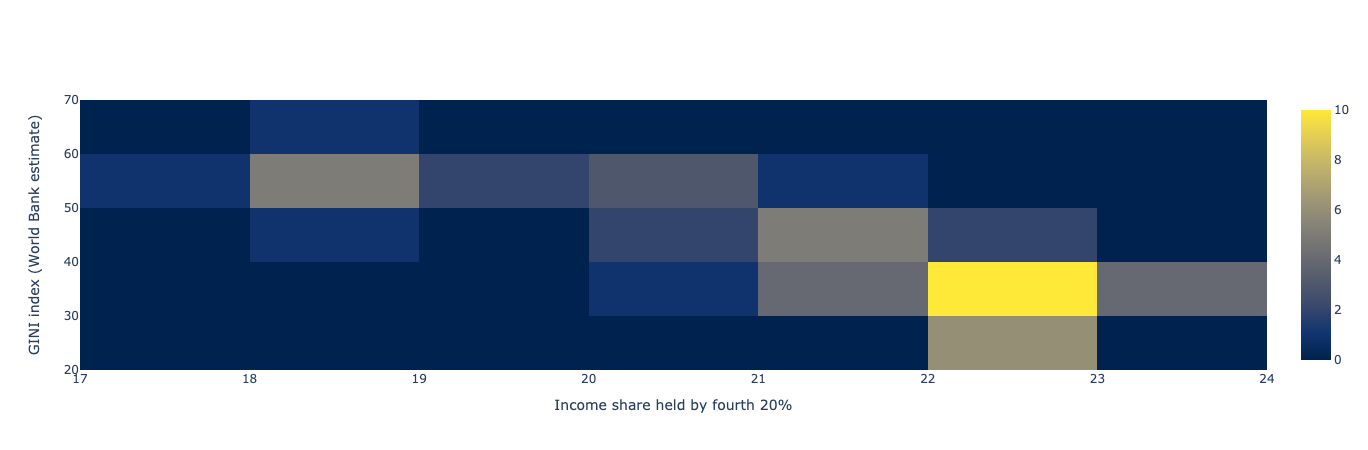

In [18]:
df = poverty[poverty['year'].eq(2000)&poverty['is_country']]
fig = go.Figure()
fig.add_histogram2d(x=df['Income share held by fourth 20%'], 
                    y=df['GINI index (World Bank estimate)'], 
                    colorscale='cividis')

fig.layout.xaxis.title = 'Income share held by fourth 20%'
fig.layout.yaxis.title = 'GINI index (World Bank estimate)'

fig

In [19]:
app = JupyterDash(__name__)

app.layout = html.Div([
    dcc.Dropdown(id='hist_2d_year',
                 value=2010,
             placeholder='Select a year',
             options=[{'label': year, 'value': year}
                      for year in poverty['year'].drop_duplicates().sort_values()]),

    dcc.Dropdown(id='hist_2d_x',
                 optionHeight=40,
                 value='GINI index (World Bank estimate)',
                 options=[{'label': indicator, 'value': indicator}
                          for indicator in poverty.columns[3:54]]),
    dcc.Dropdown(id='hist_2d_y',
                 optionHeight=40,
                 value='GINI index (World Bank estimate)',
                 options=[{'label': indicator, 'value': indicator}
                          for indicator in poverty.columns[3:54]]),
    dcc.Graph(id='hist2d_chart')

])

@app.callback(Output('hist2d_chart', 'figure'),
              Input('hist_2d_year', 'value'),
              Input('hist_2d_x', 'value'), Input('hist_2d_y', 'value'))
def plot_2d_histogram(year, x, y):
    if (not year) or (not x) or (not y):
        raise PreventUpdate
    df = poverty[poverty['is_country'] & poverty['year'].eq(year)]
    fig = go.Figure()    
    fig.add_histogram2d(x=df[x], 
                        y=df[y], 
                        colorscale='cividis')
    fig.layout.xaxis.title = x
    fig.layout.yaxis.title = y
    return fig


app.run_server(port=8052)

Dash app running on http://127.0.0.1:8052/


In [20]:
df = poverty[poverty['year'].eq(2000)&poverty['is_country']].filter(regex='Country Name|Income share')
df.head()

Country Name  Income share held by fourth 20%  \
26   Afghanistan                              NaN   
71       Albania                              NaN   
116      Algeria                              NaN   
161       Angola                             20.2   
206    Argentina                             21.3   

     Income share held by highest 10%  Income share held by highest 20%  \
26                                NaN                               NaN   
71                                NaN                               NaN   
116                               NaN                               NaN   
161                              40.2                              56.1   
206                              37.7                              55.1   

     Income share held by lowest 10%  Income share held by lowest 20%  \
26                               NaN                              NaN   
71                               NaN                              NaN   
116                              NaN                              NaN   
161                              1.0                              3.2   
206                              0.9                              3.2   

     Income share held by second 20%  Income share held by third 20%  
26                               NaN                             NaN  
71                               NaN                             NaN  
116                              NaN                             NaN  
161                              7.8                            12.7  
206                              7.6                            12.8

In [21]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.COSMO])

app.layout = html.Div([
    dbc.Col([
        DataTable(data=df.to_dict('records'),
                  columns=[{'name': col, 'id': col}
                           for col in df.columns],               
                  style_header={'whiteSpace': 'normal'},
                  fixed_rows={'headers': True},
                  virtualization=True,
                  style_as_list_view=True,
                  style_table={'height': '400px'})
    ], lg =7),
])

app.run_server(port=8053, debug=True)

Dash app running on http://127.0.0.1:8053/


In [22]:
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.COSMO])

app.layout = html.Div([
    html.Br(),
    dbc.Row([
        dbc.Col(lg=1,),
        dbc.Col([
            dbc.Label('Indicator:'),
            dcc.Dropdown(id='hist_indicator_dropdown',optionHeight=40,
                         value='GINI index (World Bank estimate)',
                         options=[{'label': indicator, 'value': indicator}
                                  for indicator in poverty.columns[3:54]]),
        ], lg=5),
        dbc.Col([
            dbc.Label('Years:'),
            dcc.Dropdown(id='hist_multi_year_selector',
                         multi=True,
                         value=[2015],
                         placeholder='Select one or more years',
                         options=[{'label': year, 'value': year}
                                  for year in poverty['year'].drop_duplicates().sort_values()]),
        ], lg=4),
    ]),
    html.Br(),
    dbc.Row([
        dbc.Col(lg=2),
        dbc.Col([
            html.Br(),
            dbc.Label('Modify number of bins:'),
            dcc.Slider(id='hist_bins_slider', 
                       dots=True, min=0, max=100, step=5, included=False,
                       marks={x: str(x) for x in range(0, 105, 5)}),
        ], lg=6)
        
    ]),

    dcc.Graph(id='indicator_year_histogram'),
    dbc.Row([
        dbc.Col(lg=2),
        dbc.Col([
            html.Div(id='table_histogram_output'),
        ], lg=7)
    ])

], style={'backgroundColor': '#E5ECF6'})

@app.callback(Output('indicator_year_histogram', 'figure'),
              Output('table_histogram_output', 'children'),
              Input('hist_multi_year_selector', 'value'),
              Input('hist_indicator_dropdown', 'value'),
              Input('hist_bins_slider', 'value'))
def display_histogram(years, indicator, nbins):
    if (not years) or (not indicator):
        raise PreventUpdate
    df = poverty[poverty['year'].isin(years) & poverty['is_country']]
    fig = px.histogram(df, x=indicator, facet_col='year', color='year', 
                       title=indicator + ' Histogram',
                       nbins=nbins,
                       facet_col_wrap=4, height=700)
    fig.for_each_xaxis(lambda axis: axis.update(title=''))
    fig.add_annotation(text=indicator, x=0.5, y=-0.12, xref='paper', yref='paper', showarrow=False)
    fig.layout.paper_bgcolor = '#E5ECF6'
    
    table = DataTable(columns = [{'name': col, 'id': col} 
                                 for col in df[['Country Name', 'year', indicator]].columns],
                      data = df[['Country Name', 'year', indicator]].to_dict('records'),

                      style_header={'whiteSpace': 'normal'},
                      fixed_rows={'headers': True},
                      virtualization=True,
                      style_table={'height': '400px'},
    
                      
                      sort_action='native',
                      filter_action='native',
                      export_format='csv',
                      style_cell={'minWidth': '150px'}),
                      
    html.Br(), html.Br(), html.Br()
    
    
    return fig, table

app.run_server(port=8054, height=900)

Dash app running on http://127.0.0.1:8054/
